# Import data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path string to variable
path = r'D:\Docs\Career Foundry\II. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis - Alina Racu'

In [3]:
# Import file
df_ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 ords_prods_cust_merged.pkl'))

In [4]:
# Check
df_ords_prods_cust_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,473747,1,3,3,12,21.0,196,1,1,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,431534,1,5,4,15,28.0,196,1,1,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,550135,1,7,1,9,20.0,196,1,1,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# Bar chart: sales distribution by day of the week

<AxesSubplot:>

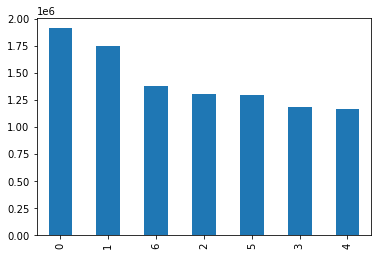

In [5]:
# Create a bar chart for the "order_day_of_week" column
df_ords_prods_cust_merged["order_day_of_week"].value_counts().plot.bar()

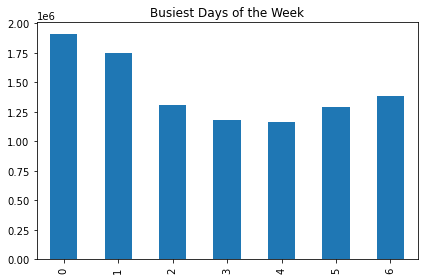

In [6]:
# Create a bar chart for the "order_day_of_week" column with categories re-sorted acc to their index order
df_ords_prods_cust_merged["order_day_of_week"].value_counts().sort_index().plot.bar()
plt.title("Busiest Days of the Week")
plt.tight_layout()

In [7]:
# Print frequencies with columns in their indexed order
df_ords_prods_cust_merged["order_day_of_week"].value_counts(dropna = False).sort_index()

0    1912844
1    1746698
2    1305496
3    1183852
4    1164303
5    1293220
6    1384493
Name: order_day_of_week, dtype: int64

Text(0.5, 1.0, 'Busiest Days of the Week')

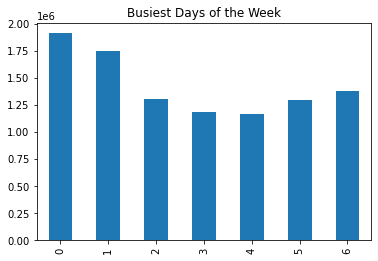

In [8]:
# Save bar chart within "bar" object
bar_orders_dow = df_ords_prods_cust_merged["order_day_of_week"].value_counts().sort_index().plot.bar()
plt.title("Busiest Days of the Week")

In [9]:
# Export bar chart outside Jupyter as image file
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 bar_orders_dow.png'))

# Histogram & scatterplot: price distribution

<AxesSubplot:ylabel='Frequency'>

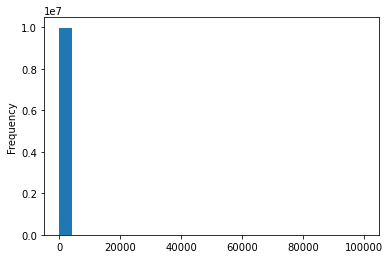

In [10]:
# Create a histogram for the "prices" column
df_ords_prods_cust_merged["prices"].plot.hist(bins = 25)

In [11]:
# Investigate
df_ords_prods_cust_merged["prices"].describe()

count    9.990906e+06
mean     1.212100e+01
std      5.111234e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
df_ords_prods_cust_merged["prices"].mean()

12.120996824448131

In [13]:
df_ords_prods_cust_merged["prices"].median()

7.4

In [14]:
df_ords_prods_cust_merged["prices"].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

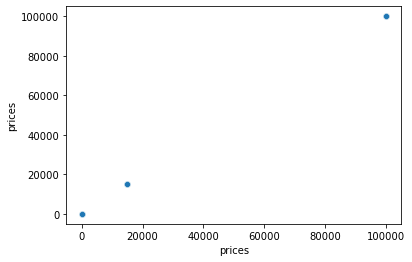

In [15]:
# Create scatterplot to identify outliers
sns.scatterplot(x = "prices", y = "prices", data = df_ords_prods_cust_merged)

In [16]:
# Show all columns
pd.options.display.max_columns = None

In [17]:
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged["prices"] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
4170,172425,3819,3,1,12,30.0,21553,14,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,8,New customer,191.746914,High spender,10.0,Frequent customer,Male,Utah,69,1/26/2020,2,married,129749,both
11010,478171,8942,3,4,12,30.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Average orders,4,New customer,3710.125926,High spender,30.0,Non-frequent customer,Female,Kansas,81,3/23/2018,1,married,130668,both
15656,950332,13460,4,3,9,16.0,21553,8,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Average orders,4,New customer,1248.958333,High spender,16.0,Regular customer,Male,Virginia,73,10/2/2018,1,married,215922,both
35641,244176,32927,3,1,22,9.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,59,Loyal customer,96.606287,High spender,5.0,Frequent customer,Male,Oregon,42,4/17/2019,1,married,268346,both
35642,927199,32927,11,2,14,1.0,21553,14,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,59,Loyal customer,96.606287,High spender,5.0,Frequent customer,Male,Oregon,42,4/17/2019,1,married,268346,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869545,710665,11969,3,3,14,11.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Slowest days,Most orders,3,New customer,5562.433333,High spender,11.0,Regular customer,Male,Michigan,77,5/9/2019,2,married,213624,both
9888619,886775,191328,5,1,18,30.0,33664,4,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Busiest days,Average orders,5,New customer,3577.825000,High spender,15.0,Regular customer,Male,New York,71,5/9/2017,2,married,166452,both
9946149,214066,92034,7,5,10,13.0,33664,2,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Most orders,7,New customer,10008.060000,High spender,13.0,Regular customer,Male,Ohio,40,2/10/2020,0,single,97243,both
9953905,706331,147991,1,2,8,NaN,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Average orders,1,New customer,25004.875000,High spender,NaN,NaN,Male,Rhode Island,74,1/11/2019,3,married,227994,both


In [18]:
# Mark outliers as missing (NaN)
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged["prices"] > 100, "prices"] = np.nan

In [19]:
# Check whether the replacement was successful
df_ords_prods_cust_merged["prices"].max()

25.0

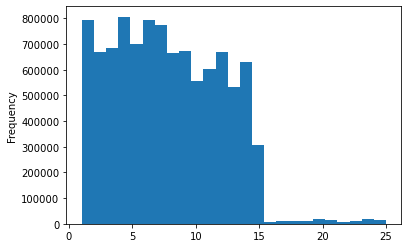

In [20]:
# Create a clean histogram for the "prices" column
hist_prices = df_ords_prods_cust_merged["prices"].plot.hist(bins = 25)

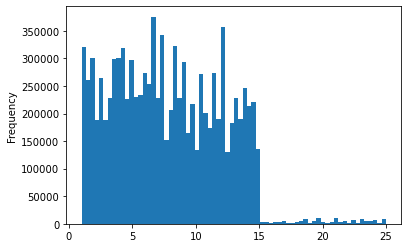

In [21]:
# Increase the level of granularity of the histogram
hist_prices_2 = df_ords_prods_cust_merged["prices"].plot.hist(bins = 70)

In [22]:
# Export histogram
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 hist_prices.png'))

In [23]:
# Export histogram
hist_prices_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 hist_prices_2.png'))

# Line charts using data sampling: prices by day of the week

In [24]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust_merged)) <= 0.7

In [25]:
# Store 70% of the sample in the df big
big = df_ords_prods_cust_merged[dev]

In [26]:
# Store 30% of the sample in the df small
small = df_ords_prods_cust_merged[~dev]

In [27]:
# Check
len(df_ords_prods_cust_merged)

9990906

In [28]:
# Check
len(big) + len(small)

9990906

In [29]:
# Reduce the sample to the columns necessary for the line chart
sample_small_prices_odow = small[["order_day_of_week", "prices"]]

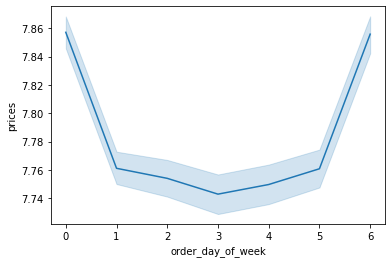

In [30]:
# Create line chart
line_prices_odow = sns.lineplot(data = sample_small_prices_odow, x = "order_day_of_week", y = "prices")

In [31]:
# Reduce the sample to the columns necessary for the line chart
sample_big_prices_odow = big[["order_day_of_week", "prices"]]

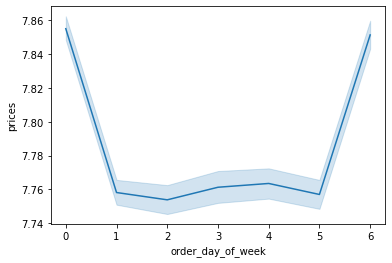

In [32]:
# Create line chart to double check sample
line_prices_odow_2 = sns.lineplot(data = sample_big_prices_odow, x = "order_day_of_week", y = "prices")

In [33]:
# Export line chart
line_prices_odow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line_prices_odow.png'))

In [34]:
# Export line chart
line_prices_odow_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line_prices_odow_2.png'))

# Histogram: sales distribution by time of the day

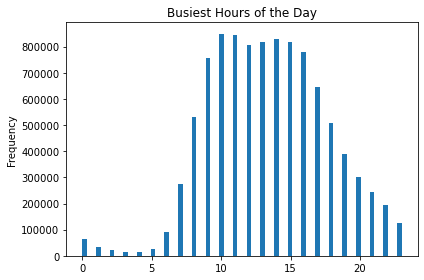

In [35]:
# Create histogram
hist_orders_hod = df_ords_prods_cust_merged["order_hour_of_day"].plot.hist(bins = 70)
plt.title("Busiest Hours of the Day")
plt.tight_layout()

The busiest shopping hours are between 10:00 and 15:00, while the least busy time is after midnight.

In [36]:
# Export histogram
hist_orders_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 hist_orders_hod.png'))

# Bar chart: customer loyalty distribution

In [37]:
# Check
df_ords_prods_cust_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

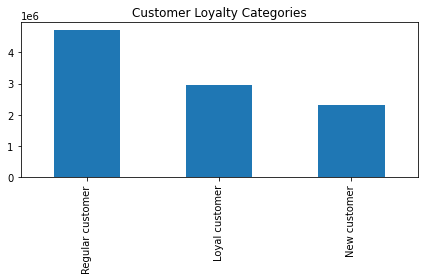

In [38]:
# Create bar chart
bar_loyalty = df_ords_prods_cust_merged["loyalty_flag"].value_counts().plot.bar()
plt.title("Customer Loyalty Categories")
plt.tight_layout()

The largest customer category is accounted by regular customers, followed by the loyal customer category.

In [39]:
# Export chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 bar_loyalty.png'))

# Line chart: prices by hour of the day

In [40]:
# Reduce the sample to the columns necessary for the line chart
sample_small_prices_hour = small[["order_hour_of_day", "prices"]]

Text(0.5, 1.0, 'Prices by Hour of the Day')

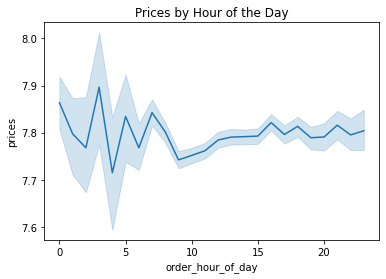

In [41]:
# Create line chart
line_prices_ohod = sns.lineplot(data = sample_small_prices_hour, x = "order_hour_of_day", y = "prices")
plt.title("Prices by Hour of the Day")

The most expensive products tend to be purchased after midnight with a peak around 2 am.

In [42]:
# Export line chart
line_prices_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line_prices_ohod.png'))

# Line chart: customer age & number of dependants

In [43]:
# Check
df_ords_prods_cust_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [44]:
# Reduce the sample to the columns necessary for the line chart
sample_small_age_dep = small[["age", "n_dependants"]]

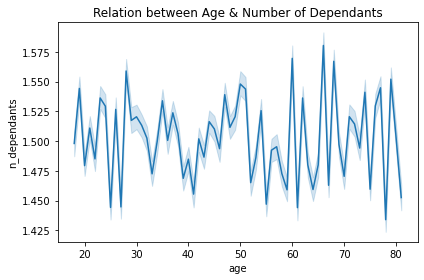

In [45]:
# Create line chart
line_age_dep = sns.lineplot(data = sample_small_age_dep, x = "age", y = "n_dependants")
plt.title("Relation between Age & Number of Dependants")
plt.tight_layout()

There is no clear pattern that would show that the age of the customers correlate with the number of dependants in their families.

In [46]:
sample_small_age_dep["n_dependants"].max()

3

In [47]:
# Export chart
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line_age_dep.png'))

# Scatterplot: customer age & income

In [48]:
# Check
df_ords_prods_cust_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

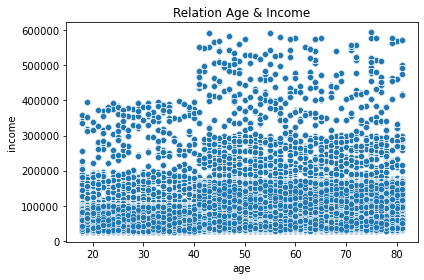

In [49]:
# Create scatterplot
scatterplot_age_income = sns.scatterplot(x = "age", y = "income", data = df_ords_prods_cust_merged)
plt.title("Relation Age & Income")
plt.tight_layout()

Customers over age of 40 tend to have a higher spending power than their younger peers.
Outliers exist in most age categories, but are prevalent in customers over 40.

In [50]:
# Export chart
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 scatterplot_age_income.png'))

# Scatterplot: customer age & family status

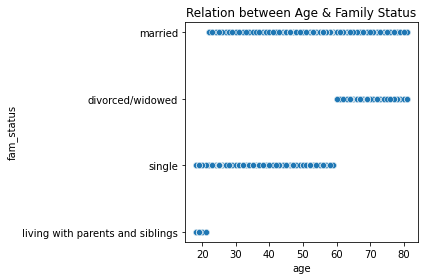

In [51]:
# Create scatterplot
scatterplot_age_fam = sns.scatterplot(x = "age", y = "fam_status", data = df_ords_prods_cust_merged)
plt.title("Relation between Age & Family Status")
plt.tight_layout()

In [52]:
# Export chart
scatterplot_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 scatterplot_age_fam.png'))

# Pie chart: price range categories

In [53]:
# Check
df_ords_prods_cust_merged["price_range_loc"].value_counts().sort_index()

High-range product     128743
Low-range product     3122612
Mid-range product     6739551
Name: price_range_loc, dtype: int64

<ipython-input-54-36c7d59648e6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel("")


Text(0, 0.5, '')

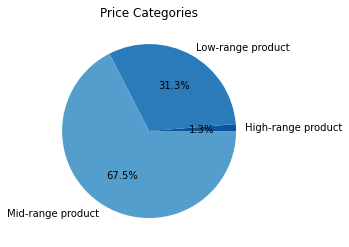

In [54]:
# Create pie chart
pie_price = df_ords_prods_cust_merged["price_range_loc"].value_counts().sort_index().plot.pie(colors = sns.color_palette("Blues_r"), autopct='%1.1f%%')
plt.title("Price Categories")
plt.axes().set_ylabel("")

In [56]:
# Export line chart outside Jupyter as image file
pie_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 pie_prices.png'))

# Export data

In [72]:
df_ords_prods_cust_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.9 ords_prods_cust_merged_clean.pkl'))